In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Visualizar primeiras linhas para entender a estrutura
print(df.head())

# Verificar valores ausentes
print(df.isnull().sum())

# Converter a coluna 'TotalCharges' para tipo numérico (alguns valores são strings vazias)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remover linhas com valores ausentes (após a conversão acima, podem surgir NaNs)
df.dropna(inplace=True)

# Verificar novamente se há valores ausentes
print(df.isnull().sum())

# Confirmar tipos de dados atualizados
print(df.dtypes)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

C:\Users\Iago Alecrim\AppData\Local\Temp\ipykernel_8332\32309663.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='pastel')
C:\Users\Iago Alecrim\AppData\Local\Temp\ipykernel_8332\32309663.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent = churn_percent[i]


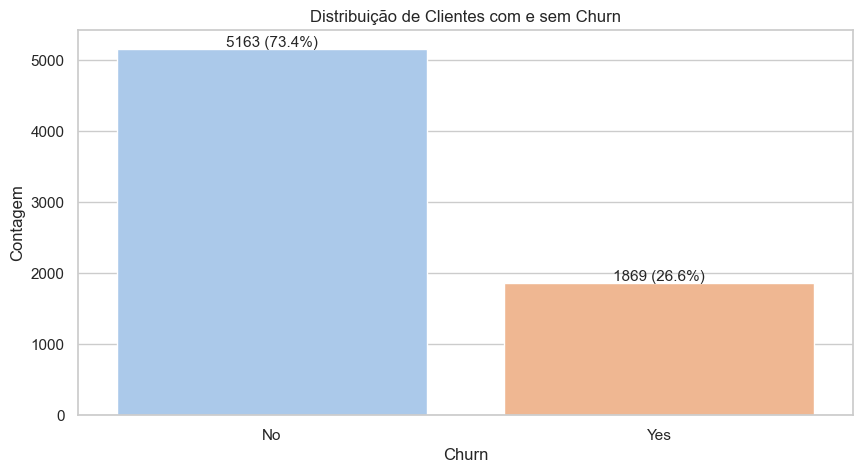

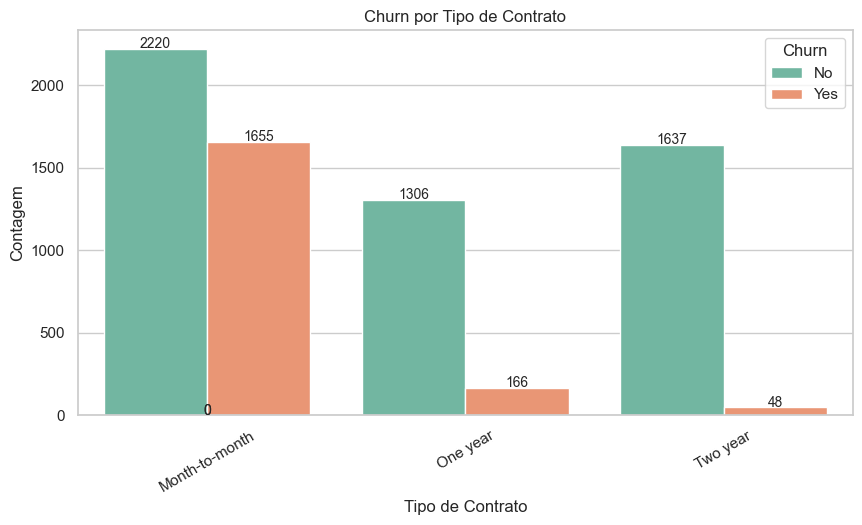

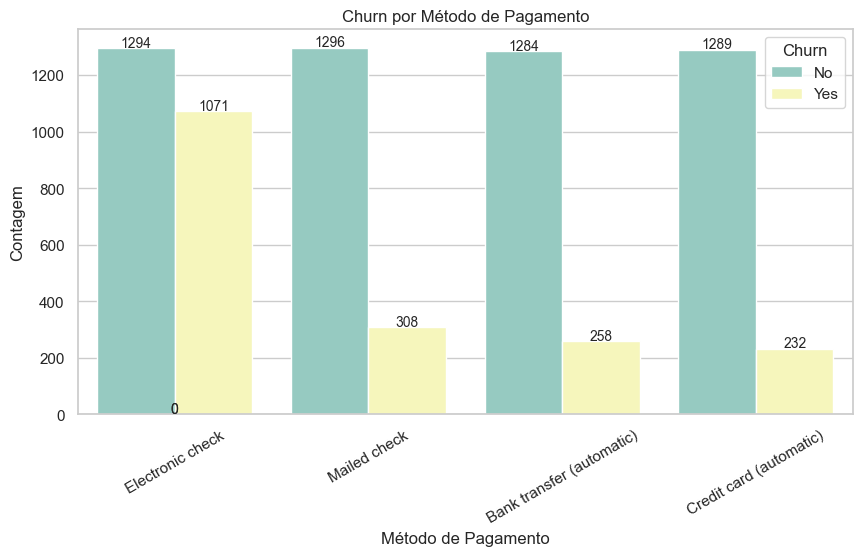

C:\Users\Iago Alecrim\AppData\Local\Temp\ipykernel_8332\32309663.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')


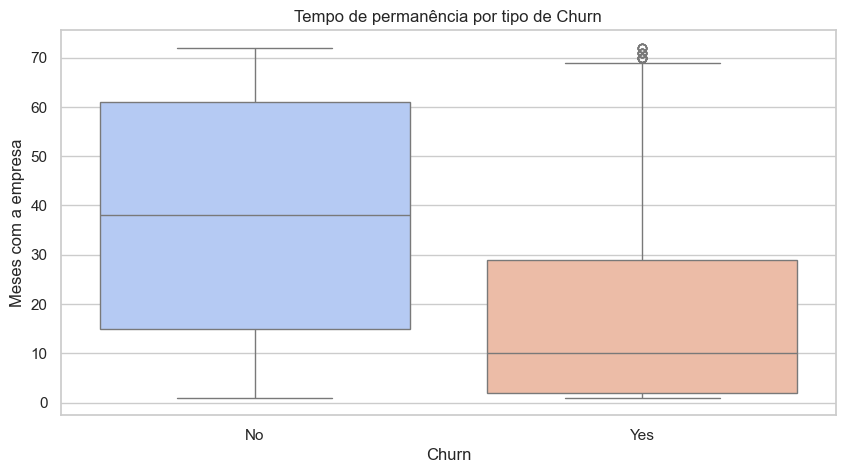

<Figure size 1000x500 with 0 Axes>

In [31]:
# Configurações gerais para os gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 1. Distribuição geral do churn
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

ax = sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribuição de Clientes com e sem Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')

# Adiciona rótulos no topo das barras
for i, count in enumerate(churn_counts):
    percent = churn_percent[i]
    ax.text(i, count + 20, f'{count} ({percent:.1f}%)', ha='center', fontsize=11)

plt.show()
plt.savefig("distribuição_churn.png", dpi=300)

# 2. Churn por tipo de contrato
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.xticks(rotation=30)
plt.legend(title='Churn')

# Adiciona rótulos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.0f}', ha="center", fontsize=10)

plt.show()
plt.savefig("churn_por_tipo_de_contrato.png", dpi=300)

# 3. Churn por método de pagamento
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set3')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=30)
plt.legend(title='Churn')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.0f}', ha="center", fontsize=10)

plt.show()
plt.savefig("churn_por_metodo_de_pagamento.png", dpi=300)

# 4. Boxplot de tempo de permanência (sem alteração, pois não tem barras)
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Tempo de permanência por tipo de Churn')
plt.xlabel('Churn')
plt.ylabel('Meses com a empresa')
plt.show()
plt.savefig("boxplot_tempo_permanencia.png", dpi=300)

In [25]:
# 1. Codificar variáveis categóricas (exceto 'customerID')
df_model = df.copy()
label_encoder = LabelEncoder()

for col in df_model.select_dtypes(include='object').columns:
    if col != 'customerID':
        df_model[col] = label_encoder.fit_transform(df_model[col])

# 2. Separar variáveis preditoras (X) e variável alvo (y)
X = df_model.drop(['customerID', 'Churn'], axis=1)
y = df_model['Churn']

# 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# 4. Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=33)
model.fit(X_train, y_train)

# 5. Fazer previsões
y_pred = model.predict(X_test)

# 6. Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[945 101]
 [194 167]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1046
           1       0.62      0.46      0.53       361

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



C:\Users\Iago Alecrim\AppData\Local\Temp\ipykernel_8332\1755072889.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


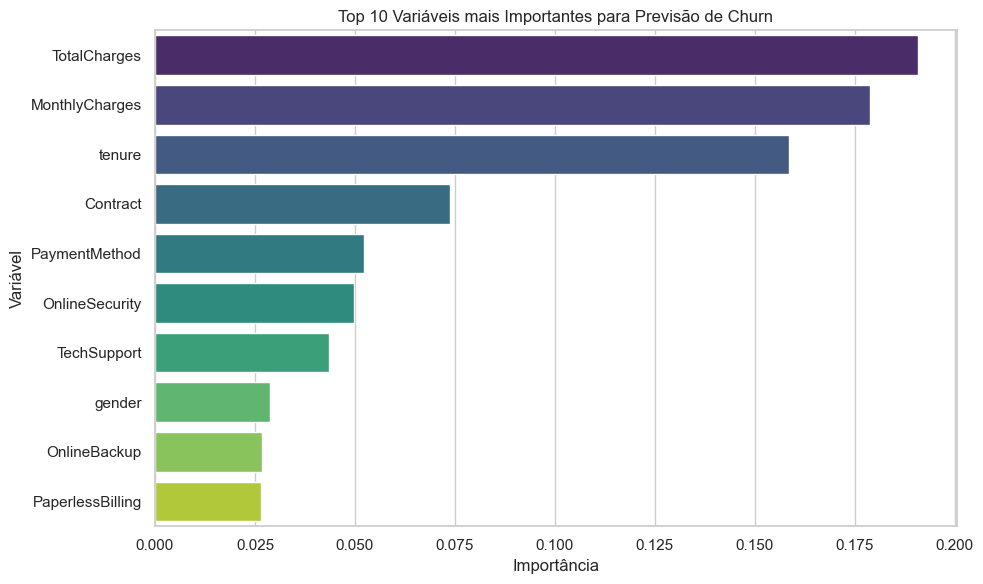

<Figure size 1000x500 with 0 Axes>

In [33]:
# Obter importâncias diretamente do modelo treinado
importances = model.feature_importances_
features = X.columns

# Criar DataFrame com os valores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotar as 10 mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Variáveis mais Importantes para Previsão de Churn')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()
plt.savefig("importancia_variaveis_churn.png", dpi=300)